In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR

In [54]:
data = pd.read_csv("Position_Salaries.csv")

In [55]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, -1].values

## Using Support vector regressor with Gaussian Kernel (rbf)

In [56]:
svr_model = SVR(kernel='rbf', gamma='scale')

In [69]:
svr_model.fit(X, y)

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## First attempt, using SVR to predict a salary without feature scaling

In [58]:
salary = np.array([[6.5]])

prediction = svr_model.predict(salary)

In [59]:
prediction

array([130001.83238905])

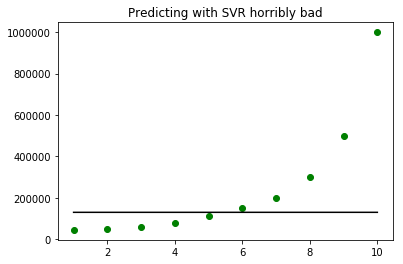

In [60]:
plt.scatter(X, y, color="green")
plt.plot(X, svr_model.predict(X), color="black")
plt.title("Predicting with SVR horribly bad")
plt.show()

## of course, with SVR we must apply feature scaling, because this model does not perform that by default

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
Xscaler = StandardScaler()
yscaler = StandardScaler()

y = y.reshape(-1,1)

X = Xscaler.fit_transform(X)
y = yscaler.fit_transform(y)

#ignore the warning bellow about converting types from in to float

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
svr_model2 = SVR(kernel='rbf', gamma='scale')

In [65]:
svr_model2.fit(X, y)

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

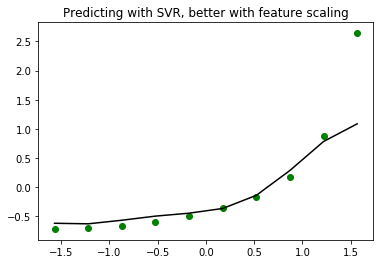

In [66]:
plt.scatter(X, y, color="green")
plt.plot(X, svr_model2.predict(X), color="black")
plt.title("Predicting with SVR, better with feature scaling")
plt.show()


## the higher point is considered an outlier and that's why it is ignore by the algorithm

In [67]:
salary = np.array([[6.5]])

prediction = yscaler.inverse_transform(svr_model2.predict(Xscaler.transform(salary)))


In [68]:
print(prediction)

array([170370.0204065])